### Importing Modules

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", palette="deep")

### Loading Dataset

In [101]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [102]:
# Data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [103]:
# 1000 rows and 8 cols
df.shape

(1000, 8)

In [104]:
# Some statistical values
df.describe().T[['mean', 'std', 'min', 'max']]

,mean,std,min,max
math score,66.089,15.163080,0.0,100.0
reading score,69.169,14.600192,17.0,100.0
writing score,68.054,15.195657,10.0,100.0


In [105]:
# Sum of null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [106]:
# Number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [107]:
# Some changes to make data look better
df.rename(columns={'gender': 'Gender', 'race/ethnicity': 'Ethnicity',
                   'parental level of education': 'Parent_education_level',
                   'lunch': 'Lunch', 'test preparation course': 'Test_preparation',
                   'math score': 'Math_score', 'reading score': 'Reading_score',
                   'writing score': 'Writing_score'}, inplace=True)
df.head(3)

df[['Gender','Ethnicity', 'Parent_education_level']] = df[['Gender', 'Ethnicity', 'Parent_education_level']].apply(lambda x: x.str.capitalize())

In [108]:
# Average score
df['Avg_score'] = ((df['Math_score'] + df['Reading_score'] + df['Writing_score']) / 3).apply(lambda x: int(x * 10) / 10)

In [109]:
df.head(3)

,Gender,Ethnicity,Parent_education_level,Lunch,Test_preparation,Math_score,Reading_score,Writing_score,Avg_score
0,Female,Group b,Bachelor's degree,standard,none,72,72,74,72.6
1,Female,Group c,Some college,standard,completed,69,90,88,82.3
2,Female,Group b,Master's degree,standard,none,90,95,93,92.6


### Visualization


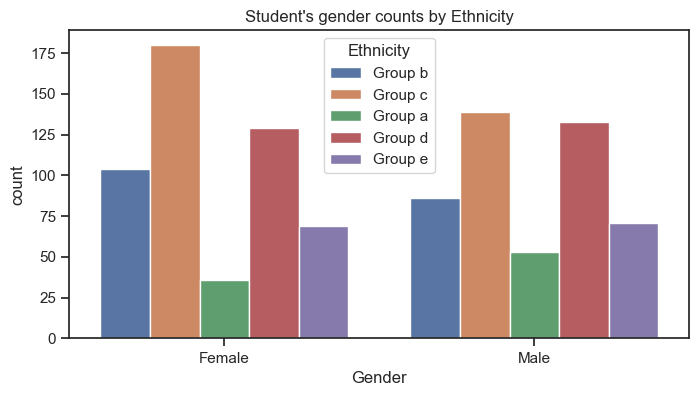

In [110]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Gender', data=df, hue='Ethnicity')
plt.title("Student's gender counts by Ethnicity")
plt.show(block=True)

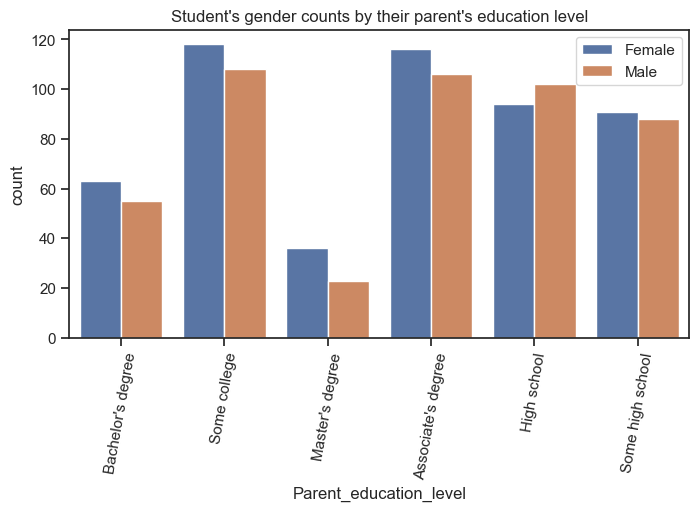

In [111]:
plt.figure(figsize=(8,4))
sns.countplot(x='Parent_education_level', hue='Gender', data=df)
plt.xticks(rotation=80)
plt.legend(labels=['Female', 'Male'])
plt.title("Student's gender counts by their parent's education level")
plt.show(block=True)

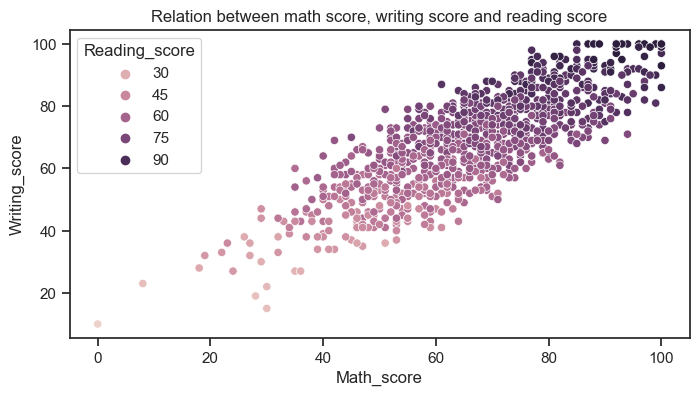

In [112]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Math_score', y='Writing_score', hue='Reading_score', data=df)
plt.title("Relation between math score, writing score and reading score")
plt.show(block=True)

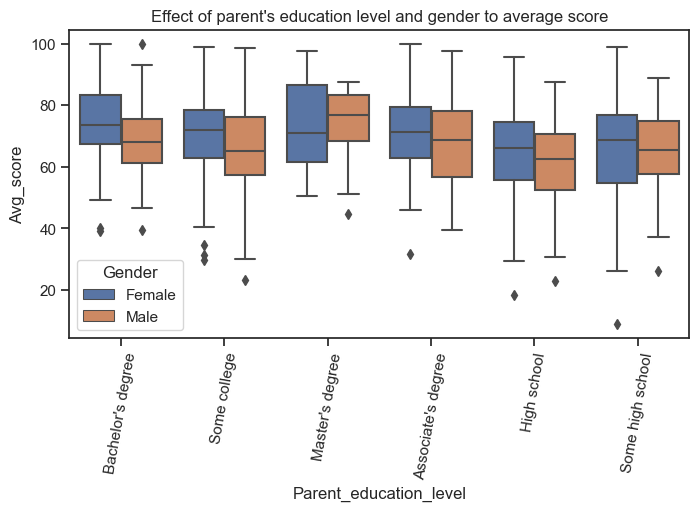

In [113]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Parent_education_level', y='Avg_score', hue='Gender', data=df)
plt.xticks(rotation=80)
plt.title("Effect of parent's education level and gender to average score")
plt.show(block=True)

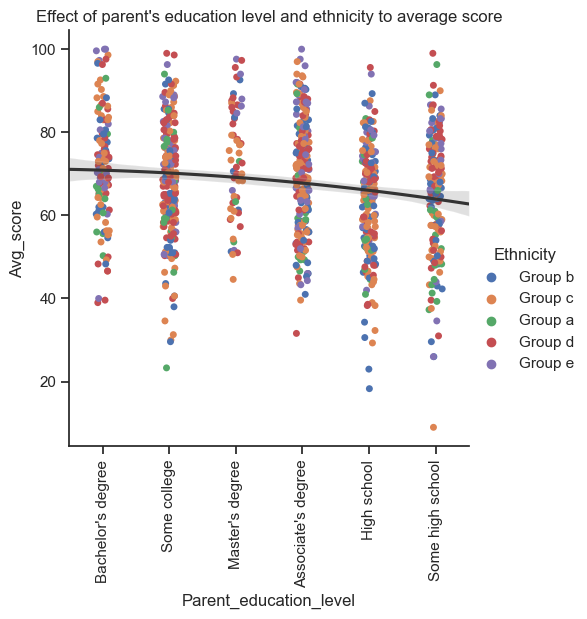

In [114]:
g = sns.catplot(data=df, x="Parent_education_level", y="Avg_score", hue="Ethnicity", native_scale=True, zorder=1)
mapping = {"Bachelor's degree": 0,
           'Some college': 1,
           "Master's degree": 2,
           "Associate's degree": 3,
           'High school': 4,
           'Some high school': 5}

df['Parent_education_level'] = df['Parent_education_level'].replace(mapping)

xticks = [0, 1, 2, 3, 4, 5]
xlabels = ["Bachelor's degree", 'Some college', "Master's degree", "Associate's degree", 'High school', 'Some high school']
g.ax.set_xticks(xticks)
g.ax.set_xticklabels(xlabels)

sns.regplot(
    data=df, x="Parent_education_level", y="Avg_score",
    scatter=False, truncate=False, order=2, color=".2",
)
plt.xticks(rotation=90)
plt.title("Effect of parent's education level and ethnicity to average score")
plt.show()

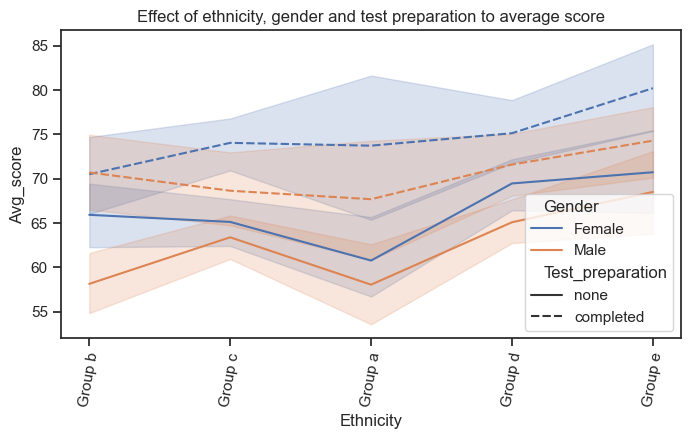

In [115]:
plt.figure(figsize=(8,4))
sns.lineplot(x='Ethnicity', y='Avg_score', hue='Gender', style='Test_preparation', data=df)
plt.xticks(rotation=80)
plt.title("Effect of ethnicity, gender and test preparation to average score")
plt.show(block=True)

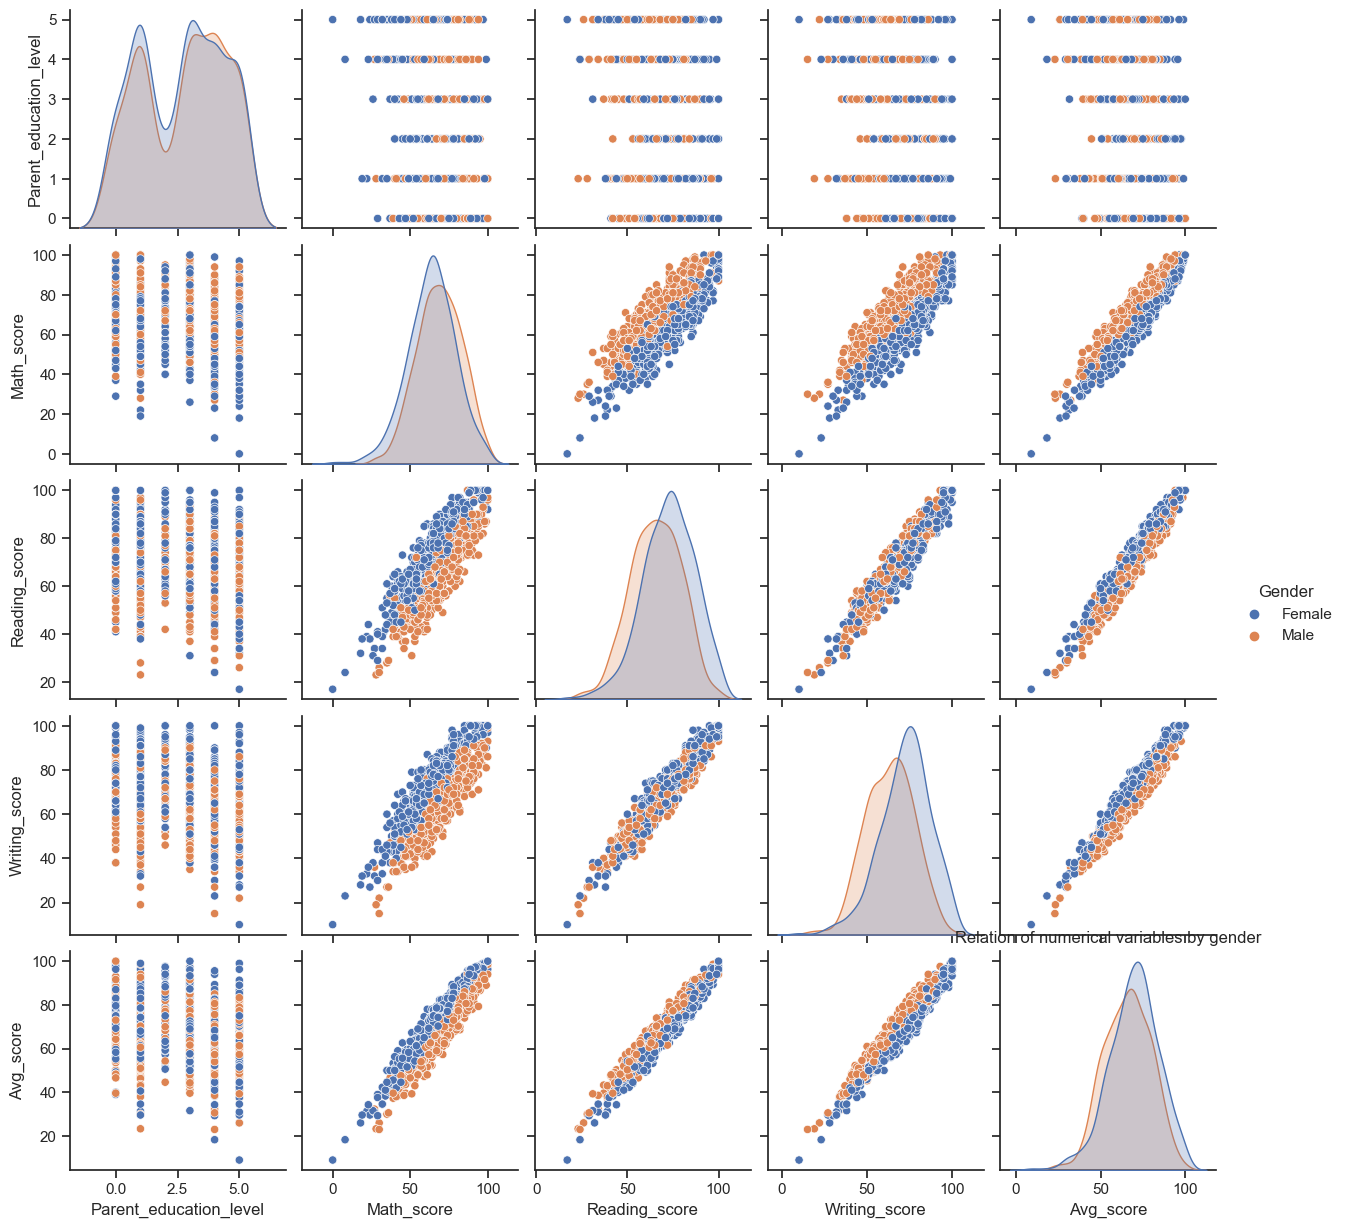

In [116]:
sns.pairplot(df, hue="Gender")
plt.title("Relation of numerical variables by gender")
plt.show(block=True)

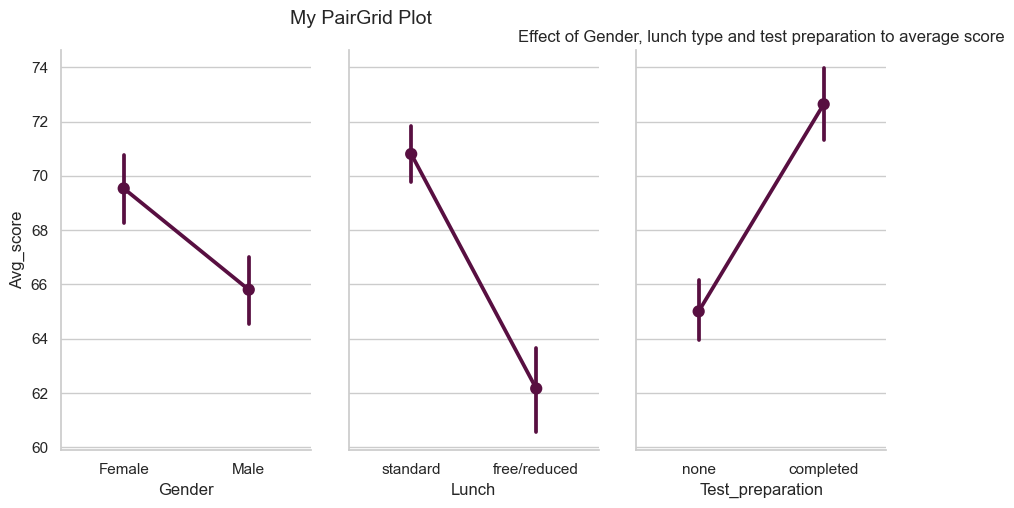

In [119]:
sns.set_theme(style="whitegrid")

g = sns.PairGrid(df, y_vars="Avg_score",
                 x_vars=["Gender", "Lunch", "Test_preparation"],
                 height=5, aspect=.5)

g.map(sns.pointplot, color="xkcd:plum")

fig = plt.gcf()
fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=1.2)

plt.suptitle('My PairGrid Plot', fontsize=14)
plt.title("Effect of Gender, lunch type and test preparation to average score")

plt.show()


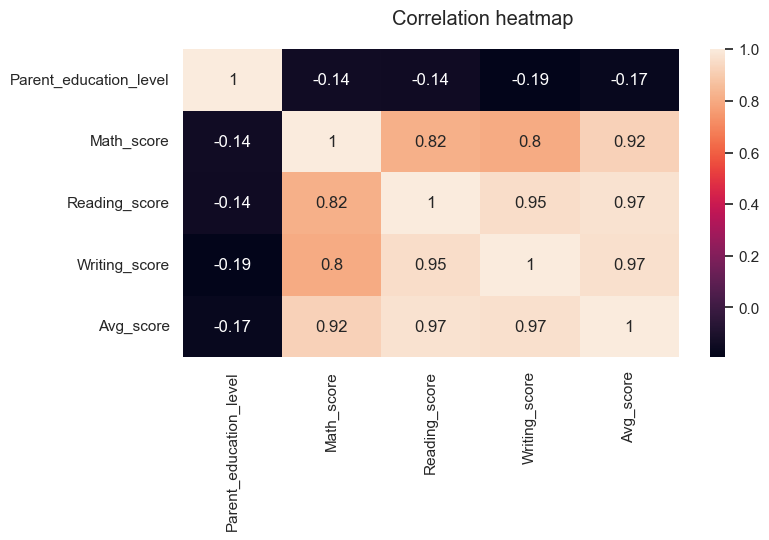

In [120]:
plt.subplots(1,1, figsize=(8,4))
sns.heatmap(df.corr(), annot=True)
plt.suptitle("Correlation heatmap")
plt.xticks(rotation=90)
plt.show(block=True)